In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv("C:/Users/MY PC/Downloads/archive (1)/creditcard_2023.csv")

In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
x_data=data.drop(["id","Class"],axis=1);

In [7]:
y_data=data["Class"]

In [8]:
x_data.shape

(568630, 29)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=1)

In [10]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [24]:
x_train.max()

V1        0.038319
V2        0.050109
V3        0.052184
V4        0.042997
V5        0.136894
V6        0.051753
V7        0.101637
V8        0.082947
V9        0.085625
V10       0.105393
V11       0.045748
V12       0.110058
V13       0.054868
V14       0.169505
V15       0.051181
V16       0.115390
V17       0.068773
V18       0.059389
V19       0.048622
V20       0.096461
V21       0.129737
V22       0.096664
V23       0.101759
V24       0.113101
V25       0.053373
V26       0.062228
V27       0.061818
V28       0.509604
Amount    1.000000
dtype: float64

In [11]:
print(f"X_train size: {x_train.shape}  X_test size: {x_test.shape}")

X_train size: (426472, 29)  X_test size: (142158, 29)


In [12]:
y_train=np.array(y_train).reshape(-1,1);

In [13]:
y_test=np.array(y_test).reshape(-1,1);

In [14]:
print(f"Y_train size: {y_train.shape}  Y_test size: {y_test.shape}")

Y_train size: (426472, 1)  Y_test size: (142158, 1)


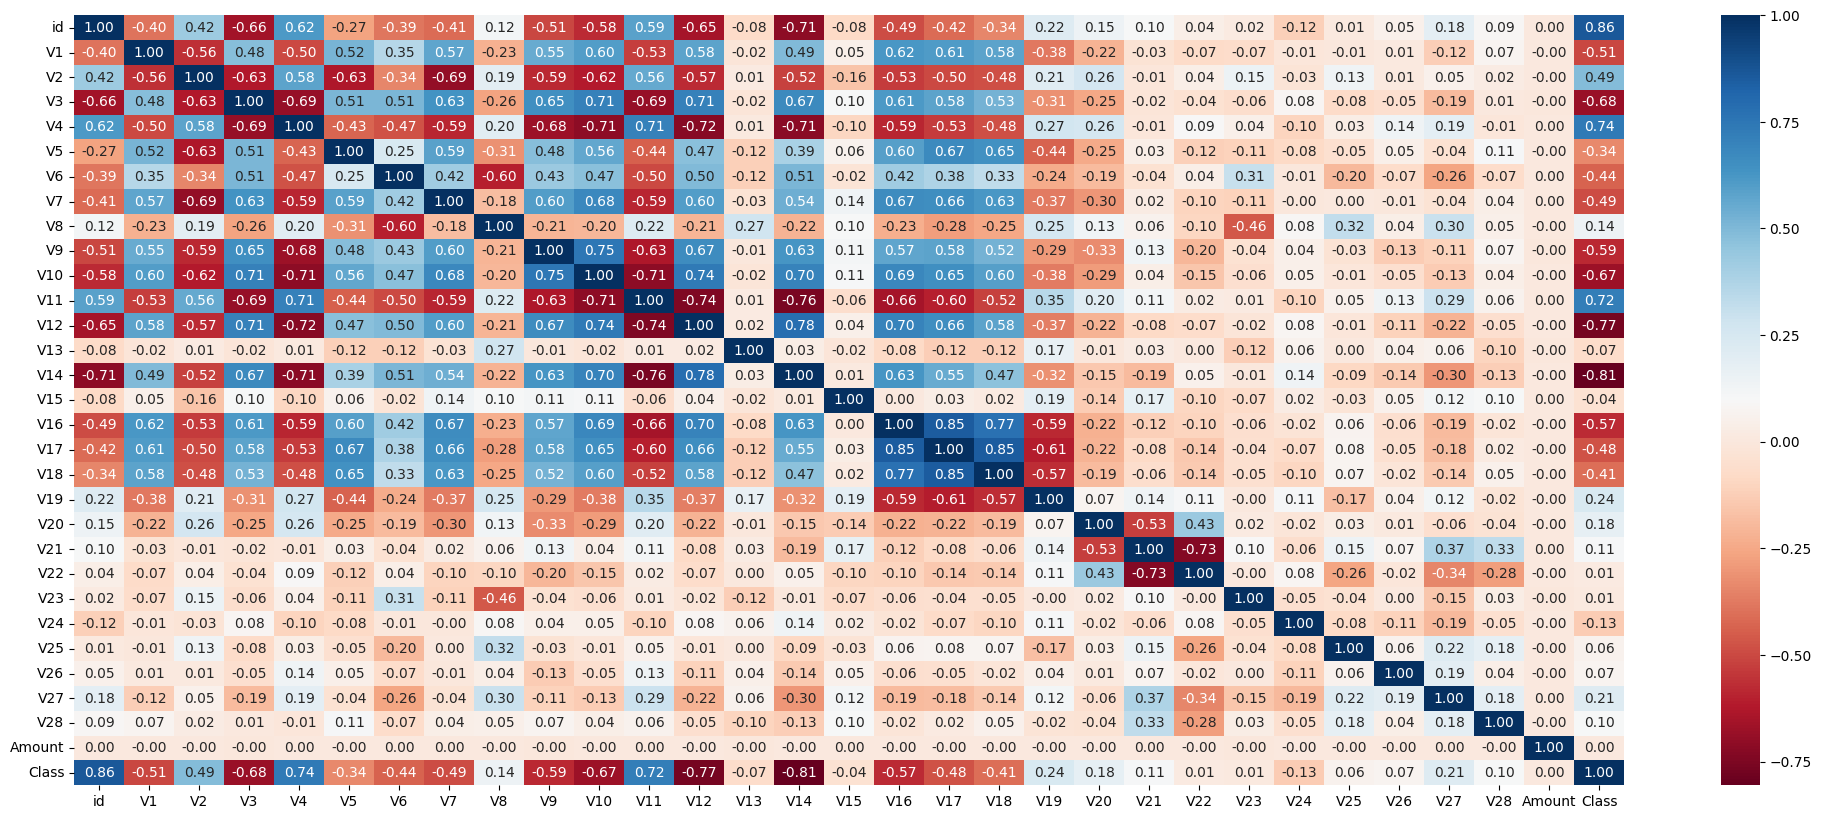

In [15]:
paper = plt.figure(figsize=[25,10])
sns.heatmap(data.corr(),cmap='RdBu',fmt=".2f",annot=True)
plt.show()


# This is the first model

In [16]:
model=Sequential()

In [17]:
model.add(Dense(units=29,activation="relu",name="L1"))
model.add(Dense(units=10,activation="relu",name="L2"))
model.add(Dense(units=1,activation="softmax",name="L3"))

In [19]:
model.compile(optimizer="adam",loss="sparsecategoricalcrossentropy",metrics=[tf.keras.metrics.Accuracy()])
model.fit(x_train,y_train,epochs=16)


Epoch 1/16

13328/13328 [==============================] - 63s 5ms/step - loss: 0.4126 - accuracy: 0.5002
Epoch 2/16
13328/13328 [==============================] - 61s 5ms/step - loss: 0.1889 - accuracy: 0.5002
Epoch 3/16
13328/13328 [==============================] - 60s 4ms/step - loss: 0.1691 - accuracy: 0.5002
Epoch 4/16
13328/13328 [==============================] - 60s 4ms/step - loss: 0.1530 - accuracy: 0.5002
Epoch 5/16
13328/13328 [==============================] - 59s 4ms/step - loss: 0.1430 - accuracy: 0.5002
Epoch 6/16
13328/13328 [==============================] - 59s 4ms/step - loss: 0.1374 - accuracy: 0.5002
Epoch 7/16
13328/13328 [==============================] - 61s 5ms/step - loss: 0.1356 - accuracy: 0.5002
Epoch 8/16
13328/13328 [==============================] - 38s 3ms/step - loss: 0.1332 - accuracy: 0.5002
Epoch 9/16
13328/13328 [==============================] - 38s 3ms/step - loss: 0.1312 - accuracy: 0.5002
Epoch 10/16
13328/13328 [============================

In [20]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss: ",loss)
print("accuracy: ",accuracy)

4443/4443 [==============================] - 12s 3ms/step - loss: 0.1302 - accuracy: 0.4995
loss:  0.13015271723270416
accuracy:  0.4995498061180115


# This is the second model

In [21]:
model2=Sequential()

In [22]:
model2.add(Dense(units=29,input_shape=(29,),activation="relu"))
model2.add(Dense(units=5,activation="relu"))
model2.add(Dense(units=1,activation="sigmoid"))

In [23]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.Accuracy()])
history=model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
13328/13328 [==============================] - 35s 3ms/step - loss: 0.4702 - accuracy: 0.0075
Epoch 2/10
13328/13328 [==============================] - 38s 3ms/step - loss: 0.2019 - accuracy: 0.0604
Epoch 3/10
13328/13328 [==============================] - 41s 3ms/step - loss: 0.1705 - accuracy: 0.0933
Epoch 4/10
13328/13328 [==============================] - 41s 3ms/step - loss: 0.1592 - accuracy: 0.1018
Epoch 5/10
13328/13328 [==============================] - 38s 3ms/step - loss: 0.1509 - accuracy: 0.1077
Epoch 6/10
13328/13328 [==============================] - 35s 3ms/step - loss: 0.1435 - accuracy: 0.1049
Epoch 7/10
13328/13328 [==============================] - 36s 3ms/step - loss: 0.1364 - accuracy: 0.0902
Epoch 8/10
13328/13328 [==============================] - 36s 3ms/step - loss: 0.1331 - accuracy: 0.0973
Epoch 9/10
13328/13328 [==============================] - 37s 3ms/step - loss: 0.1310 - accuracy: 0.1002
Epoch 10/10
13328/13328 [==============================

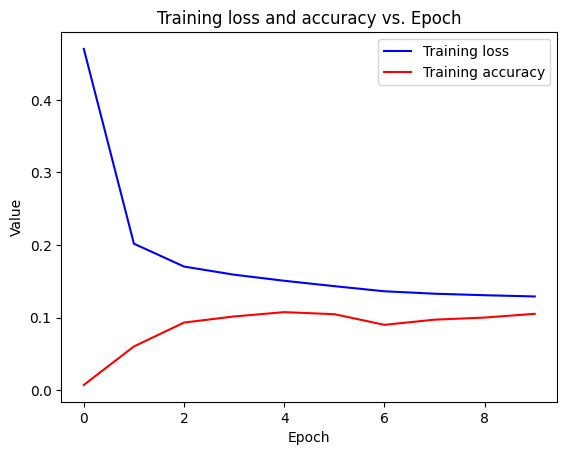

In [25]:
loss_history = history.history['loss']
accuracy_history=history.history["accuracy"]
# Plot loss history
plt.plot(loss_history, 'b', label='Training loss')
plt.plot(accuracy_history, 'r', label='Training accuracy')
plt.title('Training loss and accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [85]:
accuracy

[0.009796657599508762,
 0.11776388436555862,
 0.061750829219818115,
 0.13201570510864258,
 0.14883039891719818,
 0.05746449902653694,
 0.0529155507683754,
 0.08324110507965088,
 0.10920529067516327,
 0.08093848824501038]

In [57]:
print(x_train.shape)
print(y_train.shape)

(426472, 24)
(426472, 1)


# This is the third model

In [56]:
model3=Sequential()

In [58]:
model3.add(Dense(units=29,input_shape=(24,),activation="relu",name="L1"))
model3.add(Dense(units=15,activation="relu",name="L2"))
model3.add(Dense(units=5,activation="relu",name="L3"))
model3.add(Dense(units=1,activation="sigmoid",name="L4"))

In [59]:
model3.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.Accuracy()])
history2=model3.fit(x_train,y_train,epochs=10)

13328/13328 [==============================] - 66s 5ms/step - loss: 0.0549 - accuracy: 0.0878


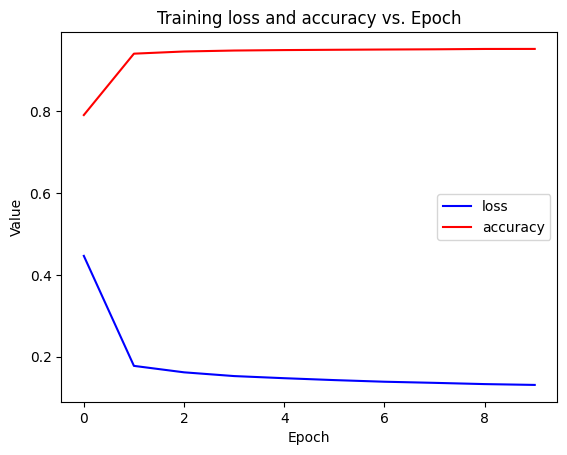

In [29]:
plt.plot(history2.history["loss"],"b",label="loss")
plt.plot(history2.history["accuracy"],"r",label="accuracy")
plt.title('Training loss and accuracy vs. Epoch')

plt.plot(history2.history["loss"],"b",label="loss")
plt.plot(history2.history["accuracy"],"r",label="accuracy")
plt.title('Test loss and accuracy vs. Epoch')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()`

In [51]:
loss_l,accuracy_l=model.evaluate(x_test,y_test)

4443/4443 [==============================] - 18s 4ms/step - loss: 0.1302 - accuracy: 0.4995


In [ ]:
plt.figure(figure_size=[25,10])
sns.heatmap(data,cmap="RdBu",annot=True,fmt=".2f")
plt.show()

# This is the fourth model -> used regularization

In [46]:
model4=Sequential()

In [47]:
model4.add(Dense(units=29,input_shape=(29,),kernel_regularizer=regularizers.l2(0.01),activation="relu",name="L1"))
model4.add(Dense(units=15,activation="relu",kernel_regularizer=regularizers.l2(0.01),name="L2"))
model4.add(Dense(units=5,activation="relu",kernel_regularizer=regularizers.l2(0.01),name="L3"))
model4.add(Dense(units=1,activation="sigmoid",name="L4"))

In [49]:
model4.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model4.fit(x_train,y_train,epochs=10)

Epoch 1/10
13328/13328 [==============================] - 66s 5ms/step - loss: 0.6980 - accuracy: 0.4995
Epoch 2/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 3/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.5007
Epoch 4/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 6/10
13328/13328 [==============================] - 64s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 7/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.5008
Epoch 8/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 9/10
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 10/10
13328/13328 [==============================

# This is the fifth model 

In [53]:
model5=Sequential()

In [54]:
model5.add(Dense(units=29,input_shape=(29,),kernel_regularizer=regularizers.l2(0.0001),activation="relu",name="L1"))
model5.add(Dense(units=15,activation="relu",kernel_regularizer=regularizers.l2(0.0001),name="L2"))
model5.add(Dense(units=5,activation="relu",kernel_regularizer=regularizers.l2(0.0001),name="L3"))
model5.add(Dense(units=1,activation="sigmoid",name="L4"))

In [55]:
model5.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history5=model5.fit(x_train,y_train,epochs=5)

Epoch 1/5
13328/13328 [==============================] - 65s 5ms/step - loss: 0.6933 - accuracy: 0.4991
Epoch 2/5
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 3/5
13328/13328 [==============================] - 63s 5ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 4/5
13328/13328 [==============================] - 62s 5ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 5/5
13328/13328 [==============================] - 62s 5ms/step - loss: 0.6932 - accuracy: 0.4994


# Remove uncorrelated data and then check 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


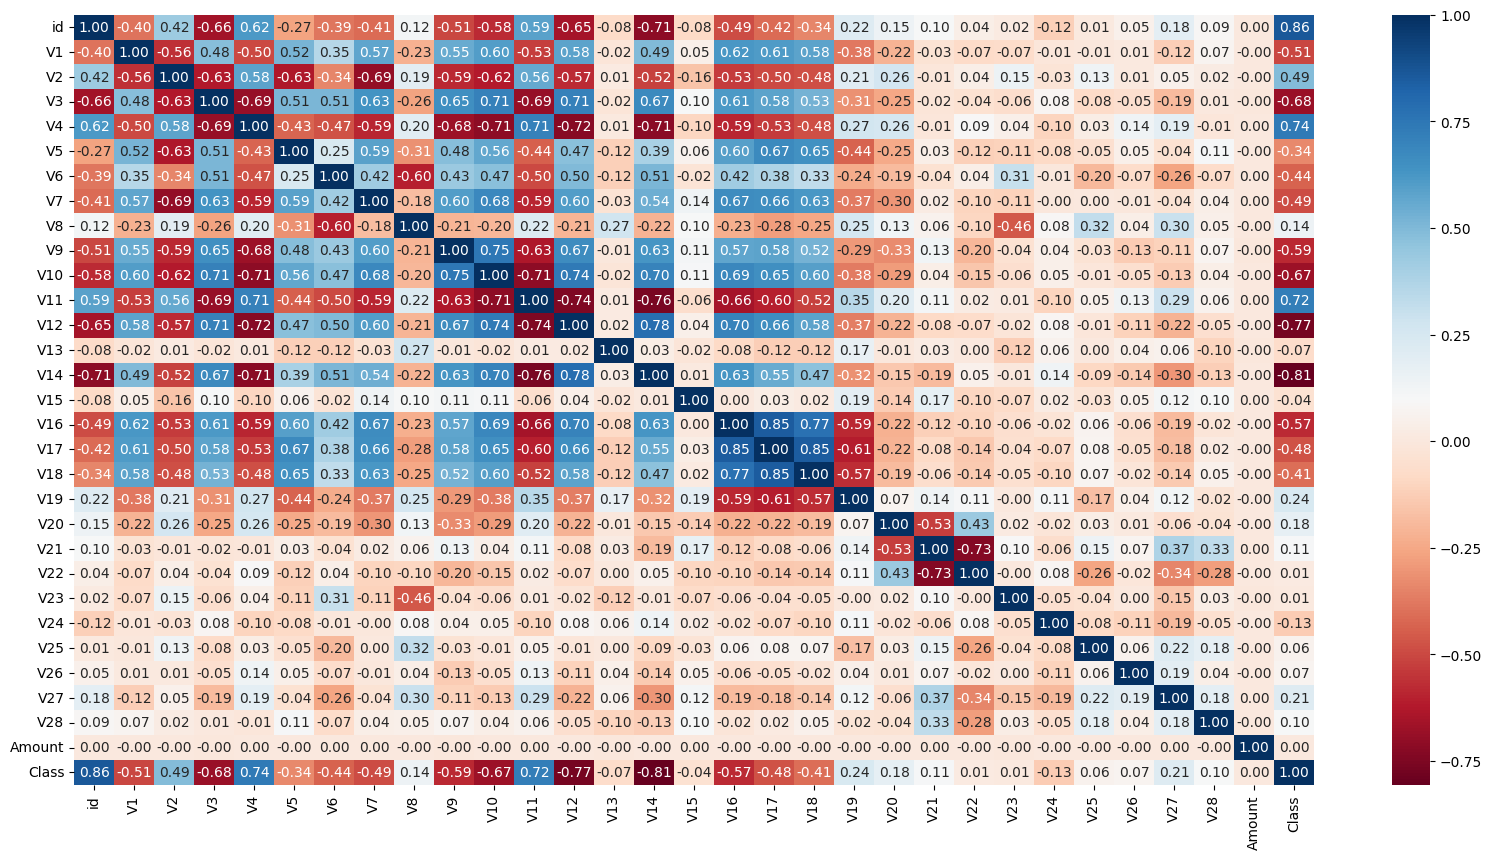

In [11]:
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),cmap="RdBu",annot=True,fmt=".2f")
plt.show()

In [ ]:
v23,v22,amount,v25,v26

In [12]:
data=data.drop(["V23","V22","Amount","V25","V26"],axis=1)

In [14]:
x_data=data.drop(["id","Class"],axis=1)

In [15]:
y_data=data["Class"]

### Spliting Data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=True)

In [30]:
y_train.shape

(426472, 1)

In [31]:
y_test.shape

(142158, 1)

In [29]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

### Normalizing data

In [32]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [37]:
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,V21,V24,V27,V28
27360,0.174246,-0.151938,0.068094,-0.174140,0.114153,0.448440,-0.001187,0.017938,0.039525,0.177562,...,0.367242,0.044780,0.029399,0.495181,-0.240602,-0.067539,-0.026716,0.393549,-0.024547,0.006991
232924,0.610811,-0.135014,-0.029069,-0.152550,0.148962,-0.001878,0.163105,-0.066169,0.291020,0.151977,...,0.085625,0.243132,0.200765,0.063425,-0.038979,-0.116091,-0.086591,0.260486,-0.104388,-0.060178
396992,-0.115329,0.136367,-0.152890,0.213769,-0.135058,-0.224940,-0.164605,0.074096,-0.234370,-0.236384,...,-0.240828,-0.270854,-0.303657,-0.298878,0.043750,0.105797,0.088033,0.126956,0.314243,0.224160
563915,-0.264391,0.047365,-0.205663,0.028843,0.002090,-0.456583,-0.158171,0.122995,-0.163280,-0.273910,...,-0.192596,-0.207975,-0.151669,-0.106732,0.157030,-0.198774,0.045237,-0.081350,0.171481,-0.362309
46094,-0.024241,-0.143019,0.700773,-0.223153,0.037385,0.169468,0.101118,-0.024158,0.176915,0.121325,...,-0.073883,0.158551,0.120900,0.214202,0.303749,0.034140,-0.026771,0.065314,-0.060540,0.044002


# This is the sixth model

In [38]:
model6=Sequential()

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426472 entries, 160883 to 128037
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      426472 non-null  float64
 1   V2      426472 non-null  float64
 2   V3      426472 non-null  float64
 3   V4      426472 non-null  float64
 4   V5      426472 non-null  float64
 5   V6      426472 non-null  float64
 6   V7      426472 non-null  float64
 7   V8      426472 non-null  float64
 8   V9      426472 non-null  float64
 9   V10     426472 non-null  float64
 10  V11     426472 non-null  float64
 11  V12     426472 non-null  float64
 12  V13     426472 non-null  float64
 13  V14     426472 non-null  float64
 14  V15     426472 non-null  float64
 15  V16     426472 non-null  float64
 16  V17     426472 non-null  float64
 17  V18     426472 non-null  float64
 18  V19     426472 non-null  float64
 19  V20     426472 non-null  float64
 20  V21     426472 non-null  float64
 21  V24     42

In [40]:
model6.add(Dense(units=24,input_shape=(24,),activation="relu",name="L1"))
model6.add(Dense(units=15,activation="relu",name="L2"))
model6.add(Dense(units=5,activation="relu",name="L3"))
model6.add(Dense(units=3,activation="relu",name="L4"))
model6.add(Dense(units=1,activation="sigmoid",name="L5"))

In [60]:
model6.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history2=model6.fit(x_train,y_train,epochs=20)

Epoch 1/20
13328/13328 [==============================] - 66s 5ms/step - loss: 0.0065 - accuracy: 0.9982
Epoch 2/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0063 - accuracy: 0.9983
Epoch 3/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 4/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0056 - accuracy: 0.9985
Epoch 5/20
13328/13328 [==============================] - 64s 5ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 6/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 7/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 8/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 9/20
13328/13328 [==============================] - 63s 5ms/step - loss: 0.0044 - accuracy: 0.9988
Epoch 10/20
13328/13328 [==============================

In [61]:
loss,accuracy=model6.evaluate(x_test,y_test)
print("Loss in the model : ",loss)
print("Accuracy of the model : ",accuracy)

4443/4443 [==============================] - 9s 2ms/step - loss: 0.0032 - accuracy: 0.9992
Loss in the model :  0.0032449678983539343
Accuracy of the model :  0.9992051124572754


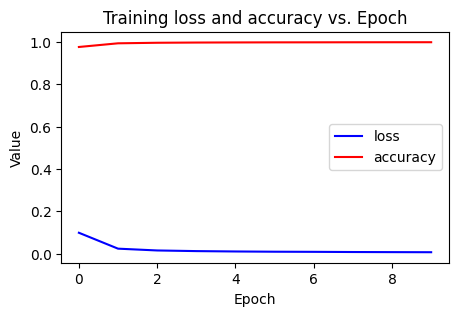

In [70]:
plt.figure(figsize=[5,3])
plt.plot(history.history["loss"],"b",label="loss")
plt.plot(history.history["accuracy"],"r",label="accuracy")
plt.title('Training loss and accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

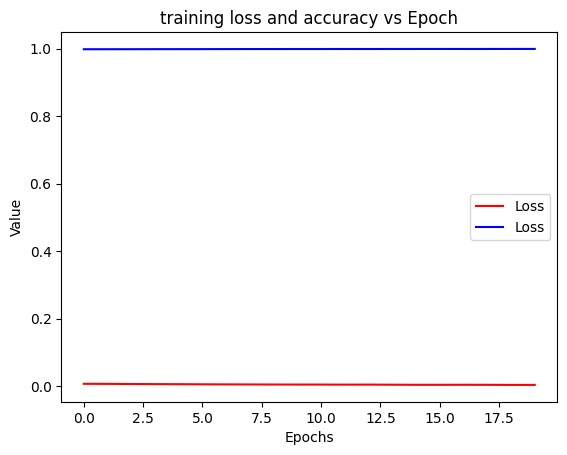

In [72]:
plt.plot(history2.history["loss"],"r",label="Loss")
plt.plot(history2.history["accuracy"],"b",label="Loss")
plt.title("training loss and accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()

# It seems the model has varience since loss in dev set is high than loss in test set.

# So lets try adding regularization to it